In [41]:
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions

print("TF version:", tf.__version__)
print("TFP version:", tfp.__version__)

TF version: 2.1.0
TFP version: 0.9.0


In [42]:
# Additional imports and setting fixed random seed to have reproducibility

import matplotlib.pyplot as plt
import numpy as np
tf.random.set_seed(123)

# Tensorflow Distributions

## Coding Tutorials
#### 1. [Univariate Distributions](#univariate_distributions)
#### 2. [Multivariate Distributions](#multivariate_distributions)
#### 3. [The Independent Distribution](#the_independent_distribution)
#### 4. [Sampling and log probs](#sampling_and_log_probs)
#### 5. [Trainable Distributions](#trainable_distributions)

***
## Univariate distributions
<a id='univariate_distributions'></a>

In [43]:
# Create a normal distribution from Tensorflow Distributions



In [44]:
# Sample from the chosen distribution...



In [45]:
# ... or sample multiple times



In [46]:
# Obtain value of probability's density



In [47]:
# Obtain value of logprobability



In [48]:
# Verify that this really is the log of the probability



In [49]:
# Plot a histogram, approximating the density


In [50]:
# Do the same for the exponential distribution



In [51]:
# Sample as before



In [52]:
# Create a Bernoulli distribution (discrete)



#### A word of caution on discrete distributions

In [53]:
# Calculate Bernoulli prob and see that 0.5 and -1 do not give the correct probability!

In [54]:
# Replicate the scores to see what is occurring under the hood

def my_bernoulli(p_success, k):
    return np.power(p_success,k)*np.power((1-p_success),(1-k))

In [55]:
# Evaluate it as before


#### Work with batch distributions

In [56]:
# Create a batched Bernoulli distribution

bernoulli_batch = tfd.Bernoulli(probs=[0.1, 0.25, 0.5, 0.75, 0.9])
bernoulli_batch

<tfp.distributions.Bernoulli 'Bernoulli' batch_shape=[5] event_shape=[] dtype=int32>

In [57]:
# Sample from it, noting the shape



In [58]:
# Use a batch shape with higher rank

probs = [[[0.5, 0.5], 
          [0.8, 0.3], 
          [0.25, 0.75]]]
bernoulli_batch_2D = tfd.Bernoulli(probs=probs)
bernoulli_batch_2D

<tfp.distributions.Bernoulli 'Bernoulli' batch_shape=[1, 3, 2] event_shape=[] dtype=int32>

In [59]:
# Sample from this batch of distributions



In [60]:
# Determine probabilities from this batch distribution

bernoulli_batch_2D.prob([[[1, 0], 
                         [0, 0], 
                         [1, 1]]])

<tf.Tensor: shape=(1, 3, 2), dtype=float32, numpy=
array([[[0.5       , 0.5       ],
        [0.19999999, 0.7       ],
        [0.25      , 0.75      ]]], dtype=float32)>

***
<a id='multivariate_distributions'></a>
## Multivariate Distributions


#### Basic multivariate distributions

In [61]:
# Define 2D multivariate Gaussian with diagonal covariance matrix



In [62]:
# Sample from it



In [63]:
# Make a plot

plt_sample = normal_diag.sample(10000)
plt.scatter(plt_sample[:, 0], plt_sample[:, 1], marker='.', alpha=0.05)
plt.axis('equal')
plt.show()

NameError: name 'normal_diag' is not defined

#### Batches of multivariate distributions

In [64]:
# Create three "batches" of multivariate normals



In [65]:
# Sample from it



In [66]:
# Compute log probs



In [67]:
# Create a sample for a plot -- notice the shape



NameError: name 'plt_sample_batch' is not defined

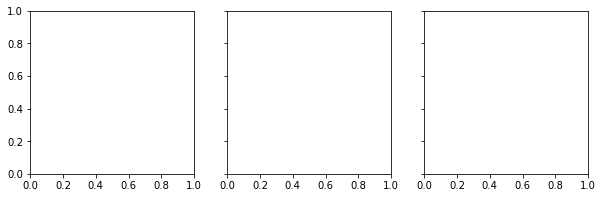

In [68]:
# Plot samples from the batched multivariate Gaussian

fig, axs = (plt.subplots(1, 3, sharex=True, sharey=True, figsize=(10, 3)))
titles = ['cov_diag=[1, 2]','cov_diag=[2, 1]', 'cov_diag=[2, 2]']

for i, (ax, title) in enumerate(zip(axs,titles)):
    samples = plt_sample_batch[:,i,:] #take the ith batch [samples x event_shape]
    ax.scatter(samples[:, 0], samples[:, 1], marker='.', alpha=0.05)
    ax.set_title(title)
plt.show()



***
<a id='the_independent_distribution'></a>
## The Independent Distribution

In [69]:
# Start by defining a batch of two univariate Gaussians, then
# combine them into a bivariate Gaussian with independent components
locs = [-1, 1]
scales = [0.5, 1.0]
batch_of_normals = tfd.Normal(loc=locs, scale=scales)


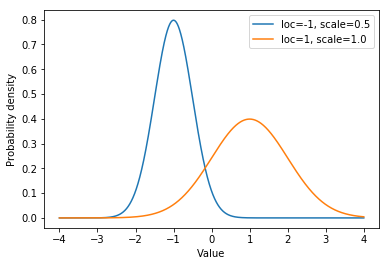

In [70]:
# Univariate density functions

import seaborn as sns

t = np.linspace(-4, 4, 10000)
densities = batch_of_normals.prob(np.repeat(t[:, np.newaxis], 2, axis=1)) # each column is a vector of densities for one distn

sns.lineplot(t, densities[:, 0], label='loc={}, scale={}'.format(locs[0], scales[0]))
sns.lineplot(t, densities[:, 1], label='loc={}, scale={}'.format(locs[1], scales[1]))
plt.ylabel('Probability density')
plt.xlabel('Value')
plt.legend()
plt.show()

In [71]:
# Check their batch_shape and event_shape
batch_of_normals


<tfp.distributions.Normal 'Normal' batch_shape=[2] event_shape=[] dtype=float32>

In [72]:
# Use Independent to convert the batch shape to the event shape
bivariane_normal = t


In [73]:
# Note that dimension from batch_shape has shifted to event_shape



In [74]:
# Create a plot showing joint density contours and marginal density functions

samples = bivariate_normal_from_Independent.sample(10000)
x1 = samples[:, 0]
x2 = samples[:, 1]
sns.jointplot(x1, x2, kind="kde", space=0, color='b', xlim=[-4, 4], ylim=[-4, 4])

NameError: name 'bivariate_normal_from_Independent' is not defined

In [75]:
# Use MultivariateNormalDiag to create the equivalent distribution
# Note that diagonal covariance matrix => no correlation => independence (for the multivariate normal distribution)



In [76]:
# Plot the joint density function of bivariate_normal_from_Independent
# Refer back to bivariate_normal_from_Independent to show that the plot is the same
# Summarise how Independent has been used

samples = bivariate_normal_from_Multivariate.sample(10000)
x1 = samples[:, 0]
x2 = samples[:, 1]
sns.jointplot(x1, x2, kind="kde", space=0, color='b', xlim=[-4, 4], ylim=[-4, 4])

NameError: name 'bivariate_normal_from_Multivariate' is not defined

#### Shifting batch dimensions to event dimensions using 
`reinterpreted_batch_ndims`

In [ ]:
# Demonstrate use of reinterpreted_batch_ndims
# By default all batch dims except the first are transferred to event dims

loc_grid = [[-100., -100.],
            [100., 100.],
            [0., 0.]]
scale_grid = [[1., 10.],
              [1., 10.],
              [1., 1.]]

normals_batch_3by2_event_1 = tfd.Normal(loc=loc_grid, scale=scale_grid)

In [ ]:
# Highlight batch_shape



In [ ]:
# We now have a batch of 3 bivariate normal distributions,
# each parametrised by a column of our original parameter grid



In [ ]:
# Evaluate log_prob



In [ ]:
# Can reinterpret _all_ batch dimensions as event dimensions



In [ ]:
# Take log_probs 



#### Using `Independent` to build a Naive Bayes classifier

#### Introduction to `newsgroups` data set

In this tutorial, just load the dataset, fetch train/test splits, probably choose a subset of the data.

Construct the class conditional feature distribution (with Independent, using the Naive Bayes assumption) and sample from it.

We can just use the ML estimates for parameters, in later tutorials we will learn them.

In [77]:
# Convenience function for retrieving the 20 newsgroups data set

# Usenet was a forerunner to modern internet forums
# Users could post and read articles
# Newsgroup corresponded to a topic
# Example topics in this data set: IBM computer hardware, baseball
# Our objective is to use an article's contents to predict its newsgroup,
# a 20-class classification problem.

# 18000 newsgroups, posts on 20 topics
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer


In [78]:
# Get the train data
newsgroups_data = fetch_20newsgroups(data_home="20_Newgroup_Data/", subset="train")


In [79]:
# More information about the data set
print(newsgroups_data["DESCR"])


.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimensionality 

In [80]:
# Example article
newsgroups_data["data"][0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

In [81]:
# Associated label
newsgroups_data["target"][0]


7

In [82]:
# Name of label
newsgroups_data["target_names"][7]


'rec.autos'

In [83]:
# Preprocessing boilerplate

n_documents = len(newsgroups_data['data'])

count_vectorizer = CountVectorizer(
    input='content',
    binary=True,
    max_df=0.25,
    min_df=1.01/n_documents
) # ignore common words, words that appear once
binary_bag_of_words = count_vectorizer.fit_transform(newsgroups_data['data']) # input is a list of strings


In [84]:
# Check shape
binary_bag_of_words.shape

(11314, 56365)

In [85]:
binary_bag_of_words[0,:].shape

(1, 56365)

In [86]:
# Check that the fit has been successful

count_vectorizer.inverse_transform(binary_bag_of_words[0,:])

[array(['lerxst', 'wam', 'umd', 'where', 'thing', 'car', 'rac3',
        'maryland', 'college', 'park', '15', 'wondering', 'anyone',
        'could', 'enlighten', 'saw', 'day', 'door', 'sports', 'looked',
        'late', '60s', 'early', '70s', 'called', 'bricklin', 'doors',
        'were', 'really', 'small', 'addition', 'front', 'bumper',
        'separate', 'rest', 'body', 'tellme', 'model', 'name', 'engine',
        'specs', 'years', 'production', 'made', 'history', 'whatever',
        'info', 'funky', 'looking', 'please', 'mail', 'thanks', 'il',
        'brought', 'neighborhood'], dtype='<U80')]

In [87]:
# Dict that will be useful later 
inv_vocabulary = {value:key for key, value in count_vectorizer.vocabulary_.items()}

#### A Naive Bayes classifier for `newsgroup`

Each feature vector $x$ is a list of indicators for whether a word appears in the article. $x_i$ is 1 if the $i$th word appears, and 0 otherwise. `inv_vocabulary` matches word indices $i$ to words.

Each label $y$ is a value in $0, 1, \ldots, 19$.

The parts of a naive Bayes classifier for this problem can be summarised as:  


- A probability distribution for the feature vector by class, $p(x|y = j)$ for each $j = 0, 1, \ldots, 19$. These probability distributions are assumed to have independent components: we can factorize the joint probability as a product of marginal probabilities
\begin{equation}
    p(x|y = j) = \prod_{i=1}^d p(x_i|y = j)
\end{equation}
These marginal probability distributions are Bernoulli distributions, each of which has a single parameter $\theta_{ji} := p(x_i = 1|y = j)$. This parameter is the probability of observing word $i$ in an article of class $j$. 

- We will use the Laplace smoothed maximum likelihood estimate to compute these parameters. Laplace smoothing involves adding small counts to every feature for each class. Else, if a feature did not appear in the training set of a class, but then we observed it in our test data the log probability would be undefined.

- A collection of class prior probabilities $p(y = j)$. These will be set by computing the class base rates in the training set.  


- A function for computing the probability of class membership via Bayes' theorem:  

\begin{equation}
    p(y = j|x) = \frac{p(x|y = j)p(y = j)}{p(x)}
\end{equation}

In [88]:
# Compute the parameter estimates (adjusted fraction of documents in class that contain word)

n_classes = newsgroups_data['target'].max() + 1
y = newsgroups_data['target']
n_words = binary_bag_of_words.shape[1]

alpha = 1e-6 # parameters for Laplace smoothing

theta = np.zeros([n_classes, n_words]) # stores parameter values - prob. word given class
for c_k in range(n_classes): # 0, 1, ..., 19
    class_mask = (y == c_k)
    N = class_mask.sum() # number of articles in class
    theta[c_k, :] = (binary_bag_of_words[class_mask, :].sum(axis=0) + alpha)/(N + alpha*2)

In [89]:
theta.shape

(20, 56365)

In [90]:
# Check whether the most probable word in each class is reasonable

most_probable_word_ix = theta.argmax(axis=1) # most probable word for each class

for j, ix in enumerate(most_probable_word_ix):
    print('Most probable word in class {} is "{}".'.format(newsgroups_data['target_names'][j],
                                                           inv_vocabulary[ix]))

Most probable word in class alt.atheism is "people".
Most probable word in class comp.graphics is "graphics".
Most probable word in class comp.os.ms-windows.misc is "windows".
Most probable word in class comp.sys.ibm.pc.hardware is "thanks".
Most probable word in class comp.sys.mac.hardware is "mac".
Most probable word in class comp.windows.x is "window".
Most probable word in class misc.forsale is "sale".
Most probable word in class rec.autos is "car".
Most probable word in class rec.motorcycles is "dod".
Most probable word in class rec.sport.baseball is "he".
Most probable word in class rec.sport.hockey is "ca".
Most probable word in class sci.crypt is "clipper".
Most probable word in class sci.electronics is "use".
Most probable word in class sci.med is "reply".
Most probable word in class sci.space is "space".
Most probable word in class soc.religion.christian is "god".
Most probable word in class talk.politics.guns is "people".
Most probable word in class talk.politics.mideast is 

In [91]:
# Define a distribution for each class
batch_of_bernoullis = tfd.Bernoulli(probs=theta)
p_x_given_y = tfd.Independent(batch_of_bernoullis, reinterpreted_batch_ndims=1)

p_x_given_y

<tfp.distributions.Independent 'IndependentBernoulli' batch_shape=[20] event_shape=[56365] dtype=int32>

In [92]:
# Take a sample of words from each class

n_samples = 10
sample = p_x_given_y.sample(n_samples)
sample.shape

TensorShape([10, 20, 56365])

In [93]:
# Choose a class

chosen_class = 15
newsgroups_data['target_names'][chosen_class]

'soc.religion.christian'

In [94]:
# Indicators for words that appear in the sample

class_sample = sample[:, chosen_class, :]
class_sample

<tf.Tensor: shape=(10, 56365), dtype=int32, numpy=
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)>

In [95]:
# Perform inverse transform to test quality of fit

aa = count_vectorizer.inverse_transform(class_sample)
aa[2]

array(['00', '15426', '18833', '22', '334', '5of5', 'actually', 'ad',
       'am', 'anyhting', 'apostacy', 'appreciated', 'apr', 'aras',
       'arrogance', 'assert', 'australia', 'been', 'body', 'bother',
       'carson', 'catholic', 'ceremony', 'children', 'christian',
       'christianity', 'christopher', 'church', 'claim', 'clearest',
       'clearly', 'come', 'common', 'confusing', 'contradictory',
       'contribution', 'copyright', 'decree', 'difficulty', 'dismiss',
       'earlier', 'either', 'essence', 'even', 'example', 'fails',
       'faith', 'finabo', 'further', 'god', 'gov', 'grounded', 'happened',
       'hell', 'him', 'his', 'history', 'home', 'hope', 'however',
       'human', 'ibm', 'incorporate', 'inspired', 'intellectual',
       'interim', 'john', 'johnsd2', 'least', 'leslie', 'life',
       'literally', 'look', 'looked', 'love', 'luckily', 'magazine',
       'man', 'martyred', 'mentioning', 'midst', 'mind', 'mindlink',
       'mmalt', 'much', 'murder', 'never', 'n

***
<a id='sampling_and_log_probs'></a>
## Sampling and log probs

In [96]:
# Make Multivariate Distribution

normal_distributions = tfd.MultivariateNormalDiag(loc=[[0.5, 1], [0.1, 0], [0, 0.2]],
                                 scale_diag=[[2, 3], [1, 3], [4, 4]])
normal_distributions

<tfp.distributions.MultivariateNormalDiag 'MultivariateNormalDiag' batch_shape=[3] event_shape=[2] dtype=float32>

In [97]:
# Sample
normal_distributions.sample(5)


<tf.Tensor: shape=(5, 3, 2), dtype=float32, numpy=
array([[[ 1.1775086 ,  2.0349584 ],
        [-0.56057847, -0.8564982 ],
        [ 1.7540954 ,  3.5154264 ]],

       [[-0.5718311 , -0.6060449 ],
        [-0.9324248 , -8.8281145 ],
        [ 0.9197962 , -1.984817  ]],

       [[-0.09479177,  1.0497051 ],
        [ 0.25928634, -1.3189373 ],
        [ 4.9773383 , -3.1545756 ]],

       [[-0.34269917,  1.2190639 ],
        [ 0.08767394, -1.3796246 ],
        [-2.8122177 , -3.9976852 ]],

       [[-0.31372982,  3.1113029 ],
        [ 0.25045082, -0.3559933 ],
        [-3.8862326 , -7.258297  ]]], dtype=float32)>

In [98]:
# Multivariate Normal batched Distribution
# We are broadcasting batch shapes of `loc` and `scal_diag` 
# against each other

loc = [[[0.3, 1.5, 1.], [0.2, 0.4, 2.8]],
        [[2., 2.3, 8], [1.4, 1, 1.3]]]
scale_diag = [0.4, 1., 0.7]
normal_distributions = tfd.MultivariateNormalDiag(loc=loc, scale_diag=scale_diag)
normal_distributions

<tfp.distributions.MultivariateNormalDiag 'MultivariateNormalDiag' batch_shape=[2, 2] event_shape=[3] dtype=float32>

In [99]:
# Use independent to move part of the batch shape
ind_normal_dist = tfd.Independent(normal_distributions, reinterpreted_batch_ndims=1)
ind_normal_dist

<tfp.distributions.Independent 'IndependentMultivariateNormalDiag' batch_shape=[2] event_shape=[2, 3] dtype=float32>

In [100]:
# Draw some samples



In [ ]:
# `[B, E]` shaped input



In [ ]:
# `[E]` shaped input (broadcasting over batch size)



In [ ]:
#`[S, B, E]` shaped input (broadcasting over samples)



In [ ]:
# `[S, b, e]` shaped input, where [b, e] is broadcastable over [B, E]



#### Naive Bayes example

Lets now use what we have learned and continue the Naive Bayes classifier we were building last tutorial.

In [101]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import f1_score

In [102]:
# Making a function get_data which:
#   1) Fetches the 20 newsgroup dataset
#   2) Performs a word count on the articles and binarizes the result
#   3) Returns the data as a numpy matrix with the labels

def get_data(categories):
    
    newsgroups_train_data = fetch_20newsgroups(data_home='20_Newsgroup_Data/',
                                               subset='train', categories=categories)
    newsgroups_test_data = fetch_20newsgroups(data_home='20_Newsgroup_Data/',
                                              subset='test', categories=categories)

    n_documents = len(newsgroups_train_data['data'])
    count_vectorizer = CountVectorizer(input='content', binary=True,max_df=0.25, min_df=1.01/n_documents)
    
    train_binary_bag_of_words = count_vectorizer.fit_transform(newsgroups_train_data['data'])
    test_binary_bag_of_words = count_vectorizer.transform(newsgroups_test_data['data']) 

    return (train_binary_bag_of_words.todense(), newsgroups_train_data['target']),  (test_binary_bag_of_words.todense(), newsgroups_test_data['target'])

In [103]:
# Defining a function to conduct Laplace smoothing. This adds a base level of probability for a given feature
# to occur in every class.

def laplace_smoothing(labels, binary_data, n_classes):
    # Compute the parameter estimates (adjusted fraction of documents in class that contain word)
    n_words = binary_data.shape[1]
    alpha = 1 # parameters for Laplace smoothing
    theta = np.zeros([n_classes, n_words]) # stores parameter values - prob. word given class
    for c_k in range(n_classes): # 0, 1, ..., 19
        class_mask = (labels == c_k)
        N = class_mask.sum() # number of articles in class
        theta[c_k, :] = (binary_data[class_mask, :].sum(axis=0) + alpha)/(N + alpha*2)

    return theta

In [104]:
# Getting a subset of the 20 newsgroup dataset

categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']

(train_data, train_labels), (test_data, test_labels) = get_data(categories=categories)
smoothed_counts = laplace_smoothing(labels=train_labels, binary_data=train_data, n_classes=len(categories))

To now make our NB classifier we need to build three functions:
* Compute the class priors
* Build our class conditional distributions
* Put it all together and classify our data

In [105]:
# Function which computes the prior probability of every class based on frequency of occurence in 
# the dataset

def class_priors(n_classes, labels):
    counts = np.zeros(n_classes)
    for c_k in range(n_classes):
        counts[c_k] = np.sum(np.where(labels==c_k, 1, 0))
    priors = counts / np.sum(counts)
    print('The class priors are {}'.format(priors))
    return priors

In [106]:
# Run the function 
priors = class_priors(n_classes=len(categories), labels=train_labels)


The class priors are [0.2359882  0.28711898 0.29154376 0.18534907]


In [107]:
# Now we will do a function that given the feature occurence counts returns a Bernoulli distribution of 
# batch_shape=number of classes and event_shape=number of features.
def make_distributions(probs):
    batch_of_bernoullis = tfd.Bernoulli(probs=probs)
    dist = tfd.Independent(batch_of_bernoullis)
    
    return dist

tf_dist = make_distributions(smoothed_counts)

In [108]:
# The final function predict_sample which given the distribution, a test sample, and the class priors:
#   1) Computes the class conditional probabilities given the sample
#   2) Forms the joint likelihood
#   3) Normalises the joint likelihood and returns the log prob

def predict_sample(dist, sample, prior):
    cond_probs = dist.log_prob(sample)
    joint_liklihood = tf.add(np.log(priors), cond_probs)
    normal_factor = tf.math.reduce_logsumexp(joint_liklihood, axis=-1, keepdims=True)
    log_prob = joint_liklihood - normal_factor
    
    return log_prob

#### Computing log_probs

In [109]:
# Predicting one example from our test data
log_prob = predict_sample(tf_dist, test_data[0], priors)
log_prob

<tf.Tensor: shape=(4,), dtype=float32, numpy=
array([-6.1736160e+01, -1.5258789e-05, -1.1619934e+01, -6.3327240e+01],
      dtype=float32)>

In [110]:
# Loop over our test data and classify.

probabilities = []
for sample, label in zip(test_data, test_labels):
    probabilities.append(tf.exp(predict_sample(tf_dist, sample, priors)))

probabilities = np.asarray(probabilities)
predicted_classes = np.argmax(probabilities, axis =-1)
print('f1 ', f1_score(test_labels, predicted_classes, average='macro'))

f1  0.7848499112849504


In [111]:
# Make a Bernoulli Naive Bayes classifier using sklearn with the same level of alpha smoothing. 

clf = BernoulliNB(alpha=0.01)
clf.fit(train_data, train_labels)
pred = clf.predict(test_data)
print('f1 from sklean ', f1_score(test_labels, pred, average='macro'))

f1 from sklean  0.8623389692276502


***
<a id='trainable_distributions'></a>
## Trainable Distributions

In [112]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import f1_score

In [113]:
# Define an exponential distribution

exponential = tfd.Exponential(rate=0.3,name='exp')

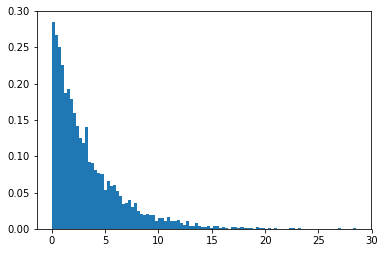

In [114]:
# Plot

plt.hist(exponential.sample(5000), bins=100, density=True)
plt.show()

In [115]:
# Define an exponential distribution with a trainable rate parameter

exp_train = tfd.Exponential(rate=tf.Variable(1.0, name='rate'), name='exp_train')
exp_train.trainable_variables

(<tf.Variable 'rate:0' shape=() dtype=float32, numpy=1.0>,)

In [116]:
# Define the negative log likelihood
def nll(x_train, dist):
    return -tf.reduce_mean(dist.log_prob(x_train))


In [117]:
# Define a function to compute the loss and gradients
@tf.function
def get_loss_and_grads(x_train, distribution):
    with tf.GradientTape() as tape:
        tape.watch(distribution.trainable_variables)
        loss = nll(x_train, distribution)
        grads = tape.gradient(loss, distribution.trainable_variables)
        
    return loss, grads

In [118]:
# Optimize

def exponential_dist_optimisation(data, distribution):

    # Keep results for plotting
    train_loss_results = []
    train_rate_results = []
    
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.05)

    num_steps = 20

    for i in range(num_steps):
        loss, grads = get_loss_and_grads(data, distribution)
        optimizer.apply_gradients(zip(grads, distribution.trainable_variables))
                                        
        rate_value = distribution.rate.value()
        train_loss_results.append(loss)
        train_rate_results.append(rate_value)
        print("Step {:03d}: Loss: {:.3f}: Rate: {:.3f}".format(i, loss, rate_value))
        
    return train_loss_results, train_rate_results

In [119]:
# Get some data and train
sampled_data = exponential.sample(5000)
train_loss_results, train_rate_results = exponential_dist_optimisation(
    data=sampled_data,
    distribution=exp_train,
)


Step 000: Loss: 3.315: Rate: 0.884
Step 001: Loss: 3.054: Rate: 0.775
Step 002: Loss: 2.824: Rate: 0.674
Step 003: Loss: 2.628: Rate: 0.582
Step 004: Loss: 2.471: Rate: 0.502
Step 005: Loss: 2.354: Rate: 0.436
Step 006: Loss: 2.276: Rate: 0.385
Step 007: Loss: 2.231: Rate: 0.349
Step 008: Loss: 2.210: Rate: 0.327
Step 009: Loss: 2.202: Rate: 0.314
Step 010: Loss: 2.199: Rate: 0.307
Step 011: Loss: 2.199: Rate: 0.304
Step 012: Loss: 2.198: Rate: 0.303
Step 013: Loss: 2.198: Rate: 0.302
Step 014: Loss: 2.198: Rate: 0.302
Step 015: Loss: 2.198: Rate: 0.302
Step 016: Loss: 2.198: Rate: 0.302
Step 017: Loss: 2.198: Rate: 0.302
Step 018: Loss: 2.198: Rate: 0.302
Step 019: Loss: 2.198: Rate: 0.302


In [120]:
# Predicted value for the rate parameter

pred_value = exp_train.rate.numpy()
exact_value = exponential.rate.numpy()

print("Exact rate: ", exact_value)
print("Pred rate:  ", pred_value)

Exact rate:  0.3
Pred rate:   0.3016669


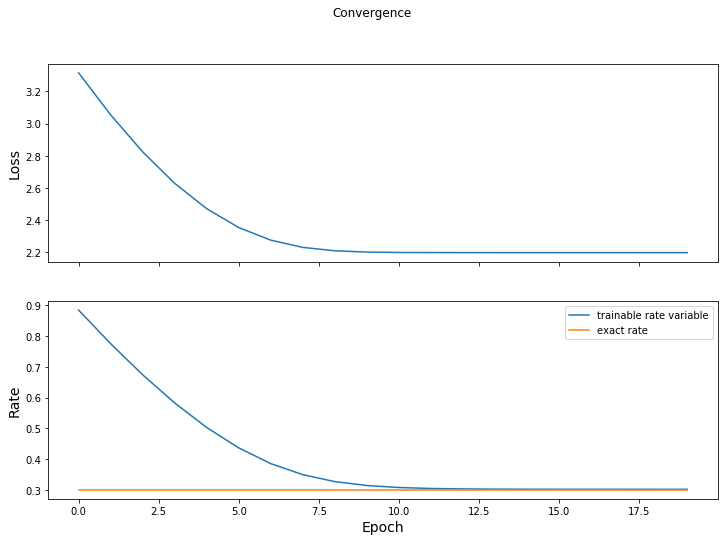

In [121]:
# Plot to see the convergence of the estimated and true parameters

tensor_exact_value = tf.constant(exact_value, shape=[len(train_rate_results)])

fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Convergence')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Rate", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_rate_results, label='trainable rate variable')
axes[1].plot(tensor_exact_value, label='exact rate')
axes[1].legend()
plt.show()

In [122]:
# Making a function get_data which:
#   1) Fetches the 20 newsgroup dataset
#   2) Performs a word count on the articles and binarizes the result
#   3) Returns the data as a numpy matrix with the labels

def get_data(categories):

    newsgroups_train_data = fetch_20newsgroups(data_home='20_Newsgroup_Data/',
                                               subset='train', categories=categories)
    newsgroups_test_data = fetch_20newsgroups(data_home='20_Newsgroup_Data/',
                                              subset='test', categories=categories)

    n_documents = len(newsgroups_train_data['data'])
    count_vectorizer = CountVectorizer(input='content', binary=True,max_df=0.25, min_df=1.01/n_documents) 
    train_binary_bag_of_words = count_vectorizer.fit_transform(newsgroups_train_data['data']) 
    test_binary_bag_of_words = count_vectorizer.transform(newsgroups_test_data['data']) 

    return (train_binary_bag_of_words.todense(), newsgroups_train_data['target']),  (test_binary_bag_of_words.todense(), newsgroups_test_data['target'])


In [123]:
# Defining a function to conduct laplace smoothing. This adds a base level of probability for a given feature
# to occur in every class.

def laplace_smoothing(labels, binary_data, n_classes):
    # Compute the parameter estimates (adjusted fraction of documents in class that contain word)
    n_words = binary_data.shape[1]
    alpha = 1 # parameters for Laplace smoothing
    theta = np.zeros([n_classes, n_words]) # stores parameter values - prob. word given class
    for c_k in range(n_classes): # 0, 1, ..., 19
        class_mask = (labels == c_k)
        N = class_mask.sum() # number of articles in class
        theta[c_k, :] = (binary_data[class_mask, :].sum(axis=0) + alpha)/(N + alpha*2)

    return theta

In [124]:
# Now we will do a function that given the feature occurence counts returns a Bernoulli distribution of 
# batch_shape=number of classes and event_shape=number of features.

def make_distributions(probs):
    batch_of_bernoullis = tfd.Bernoulli(probs=probs) # shape (n_classes, n_words)
    dist = tfd.Independent(batch_of_bernoullis, reinterpreted_batch_ndims=1)
    return dist

In [125]:
# Function which computes the prior probability of every class based on frequency of occurence in 
# the dataset

def class_priors(n_classes, labels):
    counts = np.zeros(n_classes)
    for c_k in range(n_classes):
        counts[c_k] = np.sum(np.where(labels==c_k, 1, 0))
    priors = counts / np.sum(counts)
    print('The class priors are {}'.format(priors))
    return priors

In [126]:
# The final function predict_sample which given the distribution, a test sample, and the class priors:
#   1) Computes the class conditional probabilities given the sample
#   2) Forms the joint likelihood
#   3) Normalises the joint likelihood and returns the log prob

def predict_sample(dist, sample, priors):
    cond_probs = dist.log_prob(sample)
    joint_likelihood = tf.add(np.log(priors), cond_probs)
    norm_factor = tf.math.reduce_logsumexp(joint_likelihood, axis=-1, keepdims=True)
    log_prob = joint_likelihood - norm_factor

    return log_prob

In [127]:
# Now we learn the distribution using gradient tape

def make_distribution_withGT(data, labels, nb_classes):

    class_data = []
    train_vars = []
    distributions = []
    for c in range(nb_classes):
        train_vars.append(tf.Variable(initial_value=np.random.uniform(low=0.01, high =0.1, size=data.shape[-1])))
        distributions.append(tfd.Bernoulli(probs=train_vars[c]))
        class_mask = (labels == c)
        class_data.append(data[class_mask, :])

    for c_num in range(0,nb_classes):
        optimizer = tf.keras.optimizers.Adam()
        print('\n%-------------------%')
        print('Class ', c_num)
        print('%-------------------%')

        for i in range(0,100):
            loss, grads = get_loss_and_grads(class_data[c_num], distributions[c_num])
            if (i%10==0):
                print(f"iter: {i}, loss: {loss}")

            optimizer.apply_gradients(zip(grads, distributions[c_num].trainable_variables))
            eta = 1e-3
            clipped_probs = tf.clip_by_value(
                distributions[c_num].trainable_variables,
                clip_value_min=eta,
                clip_value_max=1.0,
            )
            train_vars[c_num] = tf.squeeze(clipped_probs)
            

    dist = tfd.Bernoulli(probs=train_vars)
    dist = tfd.Independent(dist,reinterpreted_batch_ndims=1)

    print(dist)

    return dist


In [128]:
# Make the same Naive Bayes classifier we did last tutorial

categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']

(train_data, train_labels), (test_data, test_labels) = get_data(categories)

smoothed_counts = laplace_smoothing(labels=train_labels, binary_data=train_data, n_classes=len(categories))

priors = class_priors(n_classes=len(categories), labels=train_labels)
tf_dist = make_distributions(smoothed_counts)

The class priors are [0.2359882  0.28711898 0.29154376 0.18534907]


In [129]:
# Now train the distributions with gradient tape

GT_dist = make_distribution_withGT(data=train_data, labels=train_labels, nb_classes=4)


%-------------------%
Class  0
%-------------------%
iter: 0, loss: 0.07833053049234077
iter: 10, loss: 0.06898671639281234
iter: 20, loss: 0.0602724879002189
iter: 30, loss: 0.05220998575788707
iter: 40, loss: 0.044753796689009695
iter: 50, loss: 0.037852977935136096
iter: 60, loss: 0.03146886721638953
iter: 70, loss: 0.02556174202679673
iter: 80, loss: 0.020085770119792654
iter: 90, loss: 0.015000301069308086

%-------------------%
Class  1
%-------------------%
iter: 0, loss: 0.07173497116515855
iter: 10, loss: 0.06238654407981134
iter: 20, loss: 0.053587008843512925
iter: 30, loss: 0.045414516400187586
iter: 40, loss: 0.03782651023454627
iter: 50, loss: 0.03080046507793437
iter: 60, loss: 0.02430829314586982
iter: 70, loss: 0.018311586893132566
iter: 80, loss: 0.012775010424234574
iter: 90, loss: 0.0076577271629560215

%-------------------%
Class  2
%-------------------%
iter: 0, loss: 0.07829192473159087
iter: 10, loss: 0.06920068724848787
iter: 20, loss: 0.06082307961917272
iter

In [130]:
# Compare the two results

for dist in [GT_dist,tf_dist]:
    probabilities = []
    for sample, label in zip(test_data, test_labels):
        probabilities.append(predict_sample(dist, sample, priors))

    probabilities = np.asarray(probabilities)
    predicted_classes = np.argmax(probabilities, axis =-1)
    print('f1 ', f1_score(test_labels, predicted_classes, average='macro'))

f1  0.8277872752536024
f1  0.7848499112849504
